In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

df = pd.read_csv('datasets/sms_spam_svm.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


In [4]:
#install mlxtend
!pip install mlxtend

C:\Users\nanci\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


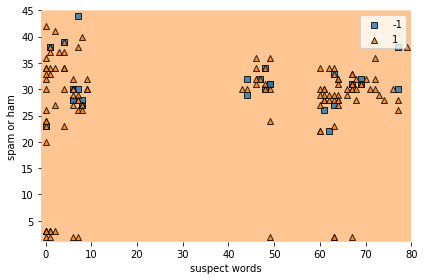

In [5]:
from mlxtend.plotting import plot_decision_regions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      clf=svm)
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.84


In [8]:
c=['linear','poly','rbf','sigmoid']
for i in c:
    svm = SVC(kernel=i, C=1.0, random_state=1)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.84


C:\Users\nanci\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.84
Accuracy: 0.80
Accuracy: 0.84


C:\Users\nanci\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nanci\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
c=1.0
for x in range(0,10):
    svm = SVC(kernel='linear', C=c, random_state=1)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    c+=.01

Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84
Accuracy: 0.84


We gained nothing in accuracy from changing the kernal nor C value set to linear. The data is already on a scale between 0-1.